In [1]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


In [2]:
from spacy import displacy
doc = nlp("She ate the pizza")
displacy.serve(doc, style="dep")

/home/user2/anaconda3/envs/RSG/lib/python3.7/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [4]:
text = """But Google is starting from behind. The company made a late push into hardware, and Apple’s Siri, available on iPhones, and Amazon’s Alexa software, which runs on its Echo and Dot devices, have clear leads in consumer adoption."""  
# nlp = spacy.load("custom_ner_model") 
doc = nlp(text) 
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [6]:
import spacy

nlp = spacy.load('en_core_web_sm')
text = 'Yuh-jung Youn won the Oscar for best supporting actress for her performance in "Minari" on Sunday and made history by becoming the first Korean actor to win an Academy Award.'
doc = nlp(text)
tokenized = list(doc)
print(tokenized)

[Yuh, -, jung, Youn, won, the, Oscar, for, best, supporting, actress, for, her, performance, in, ", Minari, ", on, Sunday, and, made, history, by, becoming, the, first, Korean, actor, to, win, an, Academy, Award, .]


In [20]:
from multiprocessing import Pool
import spacy
from spacy.matcher import Matcher
from tqdm import tqdm
import nltk
import json
import string

s = "a revolving door is convenient for two direction travel, but it also serves as a security measure at a bank."
a = "bank"
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'textcat'])
nlp.add_pipe('sentencizer')
ans_words = nlp(a)
doc = nlp(s)
ans_matcher = Matcher(nlp.vocab)
print([{'TEXT': token.text.lower()} for token in ans_words])
pattern = [{'TEXT': token.text.lower()} for token in ans_words]
ans_matcher.add("ok", [pattern])

matches = ans_matcher(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)
    
for a, b, c in matches:
    print(a, b, c)

[{'TEXT': 'bank'}]
10001145146352519825 ok 20 21 bank
10001145146352519825 20 21


In [12]:
import spacy

texts = [
    "Net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
]

nlp = spacy.load("en_core_web_sm")
for doc in nlp.pipe(texts, disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"]):
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents])

[('$9.4 million', 'MONEY'), ('the prior year', 'DATE'), ('$2.7 million', 'MONEY')]
[('twelve billion dollars', 'MONEY'), ('1b', 'MONEY')]


In [18]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", [pattern])

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


In [25]:
test = 'er123456'
print(test[:-2]) 

er1234


In [4]:
import torch.nn as nn 
import torch

class GCNLayer(nn.Module):

    def __init__(self, c_in, c_out):
        super().__init__()
        self.projection = nn.Linear(c_in, c_out)

    def forward(self, node_feats, adj_matrix):
        """
        Inputs:
            node_feats - Tensor with node features of shape [batch_size, num_nodes, c_in]
            adj_matrix - Batch of adjacency matrices of the graph. If there is an edge from i to j, adj_matrix[b,i,j]=1 else 0.
                         Supports directed edges by non-symmetric matrices. Assumes to already have added the identity connections.
                         Shape: [batch_size, num_nodes, num_nodes]
        """
        # Num neighbours = number of incoming edges
        num_neighbours = adj_matrix.sum(dim=-1, keepdims=True)
        node_feats = self.projection(node_feats)
        node_feats = torch.bmm(adj_matrix, node_feats)
        node_feats = node_feats / num_neighbours
        return node_feats

In [5]:
node_feats = torch.arange(8, dtype=torch.float32).view(1, 4, 2)
adj_matrix = torch.Tensor([[[1, 1, 0, 0],
                            [1, 1, 1, 1],
                            [0, 1, 1, 1],
                            [0, 1, 1, 1]]])

print("Node features:\n", node_feats)
print("\nAdjacency matrix:\n", adj_matrix)

Node features:
 tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]])

Adjacency matrix:
 tensor([[[1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 1., 1., 1.]]])


In [6]:
layer = GCNLayer(c_in=2, c_out=2)
layer.projection.weight.data = torch.Tensor([[1., 0.], [0., 1.]])
layer.projection.bias.data = torch.Tensor([0., 0.])

with torch.no_grad():
    out_feats = layer(node_feats, adj_matrix)

print("Adjacency matrix", adj_matrix)
print("Input features", node_feats)
print("Output features", out_feats)

Adjacency matrix tensor([[[1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 1., 1., 1.]]])
Input features tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]])
Output features tensor([[[1., 2.],
         [3., 4.],
         [4., 5.],
         [4., 5.]]])


In [29]:
import networkx as nx

G = nx.karate_club_graph()
print(type(G))           # <class 'networkx.classes.graph.Graph'>
print(G.is_directed())   # False
for node in G.nodes(data=True):
    print(node)


<class 'networkx.classes.graph.Graph'>
False
(0, {'club': 'Mr. Hi'})
(1, {'club': 'Mr. Hi'})
(2, {'club': 'Mr. Hi'})
(3, {'club': 'Mr. Hi'})
(4, {'club': 'Mr. Hi'})
(5, {'club': 'Mr. Hi'})
(6, {'club': 'Mr. Hi'})
(7, {'club': 'Mr. Hi'})
(8, {'club': 'Mr. Hi'})
(9, {'club': 'Officer'})
(10, {'club': 'Mr. Hi'})
(11, {'club': 'Mr. Hi'})
(12, {'club': 'Mr. Hi'})
(13, {'club': 'Mr. Hi'})
(14, {'club': 'Officer'})
(15, {'club': 'Officer'})
(16, {'club': 'Mr. Hi'})
(17, {'club': 'Mr. Hi'})
(18, {'club': 'Officer'})
(19, {'club': 'Mr. Hi'})
(20, {'club': 'Officer'})
(21, {'club': 'Mr. Hi'})
(22, {'club': 'Officer'})
(23, {'club': 'Officer'})
(24, {'club': 'Officer'})
(25, {'club': 'Officer'})
(26, {'club': 'Officer'})
(27, {'club': 'Officer'})
(28, {'club': 'Officer'})
(29, {'club': 'Officer'})
(30, {'club': 'Officer'})
(31, {'club': 'Officer'})
(32, {'club': 'Officer'})
(33, {'club': 'Officer'})


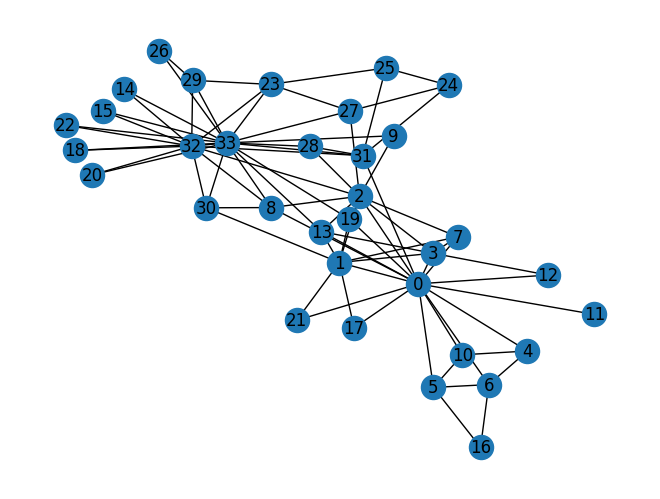

In [25]:
nx.draw(G, with_labels=True)

In [10]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = round(2 * num_edges/ num_nodes)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [11]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = nx.average_clustering(G)
  avg_cluster_coef = round(avg_cluster_coef, 2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


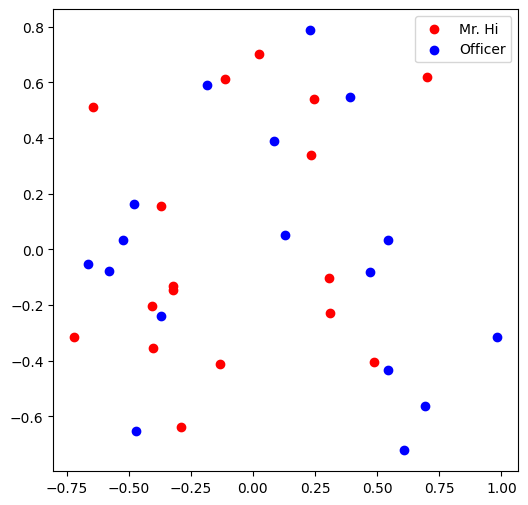

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  emb.weight.data = torch.rand(num_node, embedding_dim)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))


def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [31]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  edge_list = list(G.edges)

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index = torch.tensor(edge_list).T
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

# The pos_edge_index tensor has shape torch.Size([2, 78])
# The pos_edge_index tensor has sum value 2535

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [34]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loops should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  for i in G.nodes():
    for j in G.nodes():
      if (i, j) in G.edges(): continue
      if (j, i) in G.edges(): continue
      neg_edge_list.append((i, j))
      neg_edge_list.append((j, i))

  neg_edge_list = random.sample(neg_edge_list, num_neg_samples)
  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
for (u, v) in [edge_1, edge_2, edge_3, edge_4, edge_5]:
  if (u, v) not in pos_edge_list and (v, u) not in pos_edge_list:
    print(f'{(u, v)} is a negative edge of G')
  else:
    print(f'{(u, v)} is not a negative edge of G')


The neg_edge_index tensor has shape torch.Size([2, 78])
(7, 1) is not a negative edge of G
(1, 33) is a negative edge of G
(33, 22) is not a negative edge of G
(0, 4) is not a negative edge of G
(4, 2) is a negative edge of G


torch.Size([2, 78])
torch.Size([2, 156])
Epoch: 0, Loss: 1.9182, Accuracy: 0.5
Epoch: 1, Loss: 1.9060, Accuracy: 0.5
Epoch: 2, Loss: 1.8830, Accuracy: 0.5
Epoch: 3, Loss: 1.8507, Accuracy: 0.5
Epoch: 4, Loss: 1.8104, Accuracy: 0.5
Epoch: 5, Loss: 1.7634, Accuracy: 0.5
Epoch: 6, Loss: 1.7112, Accuracy: 0.5
Epoch: 7, Loss: 1.6550, Accuracy: 0.5
Epoch: 8, Loss: 1.5958, Accuracy: 0.5
Epoch: 9, Loss: 1.5348, Accuracy: 0.5
Epoch: 10, Loss: 1.4728, Accuracy: 0.5
Epoch: 11, Loss: 1.4108, Accuracy: 0.5
Epoch: 12, Loss: 1.3494, Accuracy: 0.5
Epoch: 13, Loss: 1.2894, Accuracy: 0.5
Epoch: 14, Loss: 1.2312, Accuracy: 0.5
Epoch: 15, Loss: 1.1753, Accuracy: 0.5
Epoch: 16, Loss: 1.1220, Accuracy: 0.5
Epoch: 17, Loss: 1.0716, Accuracy: 0.5
Epoch: 18, Loss: 1.0241, Accuracy: 0.5
Epoch: 19, Loss: 0.9798, Accuracy: 0.5
Epoch: 20, Loss: 0.9385, Accuracy: 0.5
Epoch: 21, Loss: 0.9002, Accuracy: 0.4936
Epoch: 22, Loss: 0.8649, Accuracy: 0.4936
Epoch: 23, Loss: 0.8325, Accuracy: 0.4936
Epoch: 24, Loss: 0.8027,

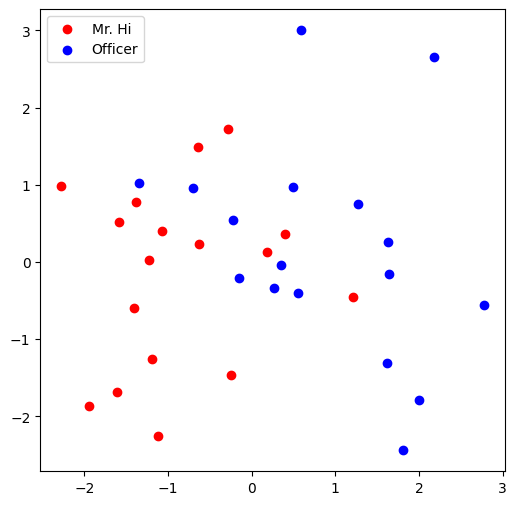

In [36]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  count = torch.sum(torch.round(pred) == label)
  accu = count / pred.shape[0]
  accu = round(accu.item(), 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (6) Update the embeddings using the loss and optimizer 
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):
    ############# Your code here ############
    optimizer.zero_grad()

    z = emb(train_edge) # (1)
    sim = torch.sum(z[0] * z[1], dim=-1) # (2)
    pred = torch.sigmoid(sim) # (3)
    loss = loss_fn(pred, train_label) # (4)
    print(f'Epoch: {i}, Loss: {loss:.4f}, Accuracy: {accuracy(pred, train_label)}') # (5)
    loss.backward() # (6)
    optimizer.step() # (6)
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

emb = create_node_emb()
train(emb, loss_fn, sigmoid, train_label, train_edge)

visualize_emb(emb)

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)

Sentence embeddings:
tensor([[ 0.0225, -0.0783, -0.0230,  ..., -0.0083,  0.0265, -0.0020],
        [ 0.0417,  0.0011, -0.0155,  ..., -0.0218, -0.0636, -0.0088]])


In [10]:
answer = [{'generated_text': 'below are facts that might be relevant to answer the question : ( 2026 fifa world cup, point in timefrica, instance of, continent ), ( north american free trade agreement, instance of, free - trade relations ), ( athapascof, language families ), ( caribbean community and common market, instance of, free - trade relations ), ( europe, instanent ), ( english, instance of, national language ), ( caricom office of trade negotiations, field of work, free - trade a( lewis and clark, instance of, overland exploration ), ( adams – onis treaty, point in time, 1819 ) question : what is tllest mountain in north america? Answer : here'}]
print(answer[0]['generated_text'])
print(answer[0]['generated_text'].split('Answer :', 1)[-1])


below are facts that might be relevant to answer the question : ( 2026 fifa world cup, point in timefrica, instance of, continent ), ( north american free trade agreement, instance of, free - trade relations ), ( athapascof, language families ), ( caribbean community and common market, instance of, free - trade relations ), ( europe, instanent ), ( english, instance of, national language ), ( caricom office of trade negotiations, field of work, free - trade a( lewis and clark, instance of, overland exploration ), ( adams – onis treaty, point in time, 1819 ) question : what is tllest mountain in north america? Answer : here
 here


ImportError: attempted relative import with no known parent package

In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to("cuda")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

/home/user2/anaconda3/envs/py3_10_RSG/lib/python3.10/site-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


: 